# Veri Görselleştirme
* Matplotlib (low level)*
* Pandas*
* Seaborn*
* ggplot
* Bokeh
* Plot.ly


## 1. Veriye ilk bakış

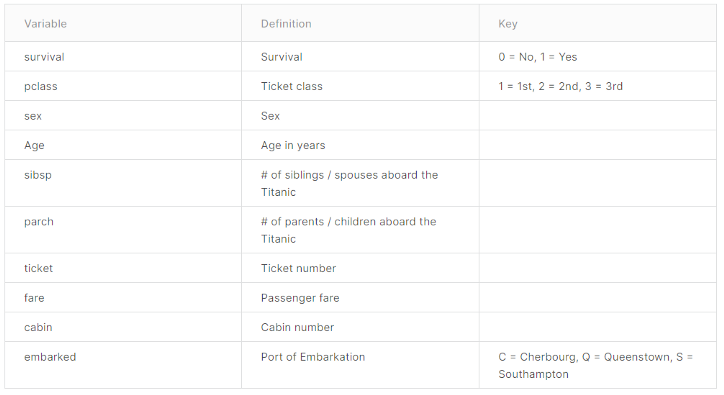

In [2]:
import seaborn as sns 
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic=titanic.drop(["pclass","who","adult_male","alive","alone","embark_town"], axis = 1)

In [7]:
#ilk etapta object olarak görünen sex ve embarked değişkenlerini kategorik değişkene çevirelim
import pandas as pd 
titanic.sex = pd.Categorical(titanic.sex)
titanic.embarked = pd.Categorical(titanic.embarked)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    category
 2   age       714 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   fare      891 non-null    float64 
 6   embarked  889 non-null    category
 7   class     891 non-null    category
 8   deck      203 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 39.1 KB


## 2. Veri Setinin Betimlenmesi

In [9]:
import seaborn as sns 
titanic = sns.load_dataset("titanic")
import pandas as pd 
titanic=titanic.drop(["pclass","who","adult_male","alive","alone","embark_town"], axis = 1)
titanic.sex = pd.Categorical(titanic.sex)
titanic.embarked = pd.Categorical(titanic.embarked)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    category
 2   age       714 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   fare      891 non-null    float64 
 6   embarked  889 non-null    category
 7   class     891 non-null    category
 8   deck      203 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 39.1 KB


In [10]:
titanic.describe().T #eksik gözlemleri göz ardı eder ve kategorik değişkenleri görmezden gelir

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 3. Eksik Değerlerin İncelenmesi

In [12]:
#eksik gözlem var mi?
import seaborn as sns 
titanic = sns.load_dataset("titanic")
import pandas as pd 
titanic=titanic.drop(["pclass","who","adult_male","alive","alone","embark_town"], axis = 1)
titanic.sex = pd.Categorical(titanic.sex)
titanic.embarked = pd.Categorical(titanic.embarked)
titanic.isnull().values.any()

True

In [13]:
#hangi degiskenlerde kac tane var
titanic.isnull().sum()

survived      0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
deck        688
dtype: int64

In [17]:
#eksik verilerin duzenlenmesi icin farkli yontemler mevcut
#ancak burada en temel olarak NA degerleri 0 ile degistirebiliriz,ortalama değer konulabiliriz, eksik verilerin tamamini silebiliriz.
#ya da farklı bir çok yöntem uygulayabiliriz
#bu noktada verisetini iyi anlayip seti bozmayacak en uygun yöntem secilmelidir.
titanic["age"].fillna(titanic.age.median(), inplace = True)

In [19]:
titanic = titanic.dropna(subset=["embarked"])


In [20]:
titanic.isnull().sum()

survived      0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
deck        688
dtype: int64

In [21]:
titanic["deck"] = titanic["deck"].cat.add_categories("M").fillna("M")

In [22]:
titanic.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
deck        0
dtype: int64

## 4. Kategorik Değişken Özetleri

In [23]:
import seaborn as sns 
titanic = sns.load_dataset("titanic")
import pandas as pd 
titanic=titanic.drop(["pclass","who","adult_male","alive","alone","embark_town"], axis = 1)
titanic.sex = pd.Categorical(titanic.sex)
titanic.embarked = pd.Categorical(titanic.embarked)
titanic.isnull().values.any()
titanic["age"].fillna(titanic.age.median(), inplace = True)
titanic = titanic.dropna(subset=["embarked"])
titanic["deck"] = titanic["deck"].cat.add_categories("M").fillna("M")
titanic.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,deck
0,0,male,22.0,1,0,7.2500,S,Third,M
1,1,female,38.0,1,0,71.2833,C,First,C
2,1,female,26.0,0,0,7.9250,S,Third,M
3,1,female,35.0,1,0,53.1000,S,First,C
4,0,male,35.0,0,0,8.0500,S,Third,M


In [27]:
katTitanic = titanic.select_dtypes(include = ["category"]) #kategori donusumu yapilmadıysa category yerine object yazilmali

In [28]:
katTitanic.head()

,sex,embarked,class,deck
0,male,S,Third,M
1,female,C,First,C
2,female,S,Third,M
3,female,S,First,C
4,male,S,Third,M


In [30]:
katTitanic.deck.unique() #kategoriler neler

['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M']

In [31]:
katTitanic["deck"].value_counts().count() # kac kategori var

8

In [32]:
katTitanic["deck"].value_counts() # kategorilerin frekanslari neler

M    688
C     59
B     45
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

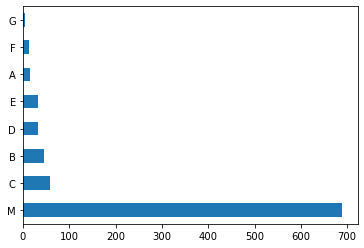

In [33]:
katTitanic["deck"].value_counts().plot.barh(); #ustte cikan minik bilgiyi kapatmak icin kullanilir

In [38]:
titanic[["survived","deck"]].groupby("deck")["survived"].mean()

deck
A    0.466667
B    0.733333
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299419
Name: survived, dtype: float64

<AxesSubplot:xlabel='deck'>

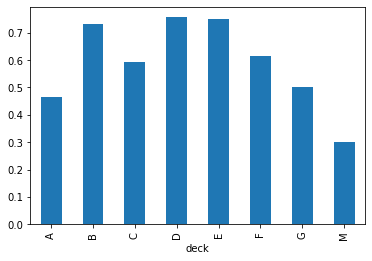

In [39]:
titanic[["survived","deck"]].groupby("deck")["survived"].mean().plot(kind="bar")

In [40]:
titanic[["survived","deck"]].groupby("deck")["survived"].sum()

deck
A      7
B     33
C     35
D     25
E     24
F      8
G      2
M    206
Name: survived, dtype: int64

<AxesSubplot:xlabel='deck'>

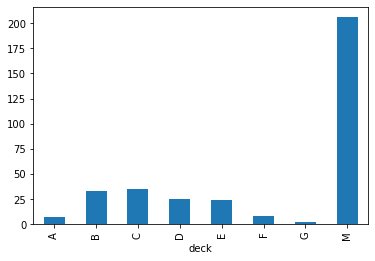

In [41]:
titanic[["survived","deck"]].groupby("deck")["survived"].sum().plot(kind="bar")

,survived,age,sibsp,parch,fare
deck,,,,,
A,7,622.00,2,2,594.3583
B,33,1529.00,17,27,5174.7709
C,35,2064.42,38,28,5908.9291
D,25,1266.00,14,10,1889.0710
E,24,1199.50,10,10,1472.8542
F,8,275.50,7,7,243.0583
G,2,59.00,2,5,54.3250
M,206,19045.75,376,251,13196.5825


## 5. Sürekli Değişken Özetleri

In [34]:
import seaborn as sns 
titanic = sns.load_dataset("titanic")
import pandas as pd 
titanic=titanic.drop(["pclass","who","adult_male","alive","alone","embark_town"], axis = 1)
titanic.sex = pd.Categorical(titanic.sex)
titanic.embarked = pd.Categorical(titanic.embarked)
titanic.isnull().values.any()
titanic["age"].fillna(titanic.age.median(), inplace = True)
titanic = titanic.dropna(subset=["embarked"])
titanic["deck"] = titanic["deck"].cat.add_categories("M").fillna("M")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  889 non-null    int64   
 1   sex       889 non-null    category
 2   age       889 non-null    float64 
 3   sibsp     889 non-null    int64   
 4   parch     889 non-null    int64   
 5   fare      889 non-null    float64 
 6   embarked  889 non-null    category
 7   class     889 non-null    category
 8   deck      889 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 45.9 KB


In [35]:
numTitanic = titanic.select_dtypes(include = ["float64", "int64"])
numTitanic.head()

,survived,age,sibsp,parch,fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [36]:
numTitanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
age,889.0,29.315152,12.984932,0.42,22.0000,28.0000,35.0,80.0000
sibsp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


In [37]:
print("Ortalama: " + str(numTitanic["fare"].mean()))
print("Dolu Gözlem Sayısı: " + str(numTitanic["fare"].count())) 
print("Maksimum Değer: " + str(numTitanic["fare"].max()))
print("Minimum Değer: " + str(numTitanic["fare"].min()))
print("Medyan: " + str(numTitanic["fare"].median()))
print("Standart Sapma: " + str(numTitanic["fare"].std()))

Ortalama: 32.09668087739029
Dolu Gözlem Sayısı: 889
Maksimum Değer: 512.3292
Minimum Değer: 0.0
Medyan: 14.4542
Standart Sapma: 49.69750431670801
